
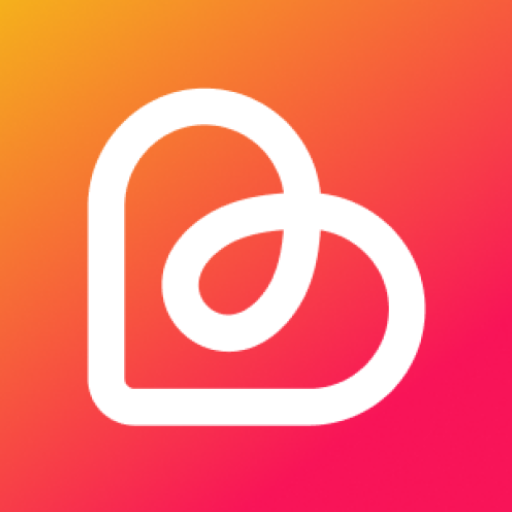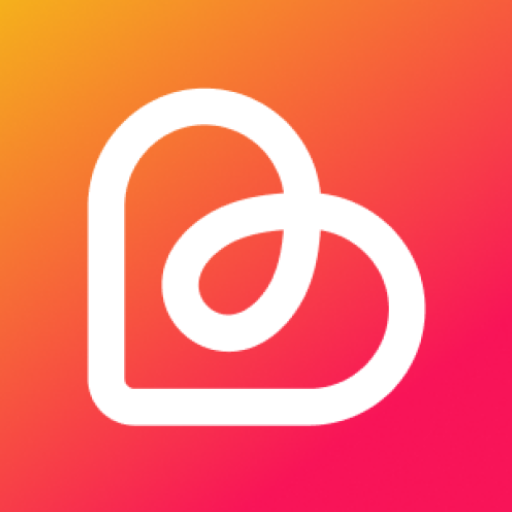

# <span style="color:#73aafa"> 1. Summary </span> 

Bellabeat is a high-tech company that manufactures health-focused smart products. In Bellabeat they develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.


# <span style="color:#73aafa">  2. Ask Phase </span> 


Business Task is to analyze smart device usage data in order to gain insight into how consumers are using their smart devices. Discover trends in smart device usage and how could these trends apply to Bellabeat customers. The insights been discovered will then help guide marketing strategy for the company. The analysis will be presented to the Bellabeat executive team along with high-level recommendations for Bellabeat’s marketing strategy.

Characters - Stakeholders
* Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
* Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
* Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’’


# <span style="color:#73aafa">  3. Prepare Phase </span> 

The data source used is FitBit Fitness Tracker Data. This dataset it is open-source stored in Kaggle and was made available through Mobius. The owner has dedicated the work to the public domain by waiving all of his or her rights to the work worldwide under copyright law, including all related and neighboring rights, to the extent allowed by law. You can copy, modify, distribute and perform the work, even for commercial purposes, all without asking permission.

These datasets were generated by respondents to a distributed survey via "Amazon Mechanical Turk" between 12.Mar.2016 - 12.May.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

Is the data ROCCC?
* Reliability : The sample size is relatively small, only 30 users, not represent the population and so we could encounter sampling bias.  Problem also is the two months long only time limitation of the survey.
* Original : The data is not original as it has been sourced from “Amazon Mechanical Turk” who is not the owner of the data
* Comprehensive : The dataframes selected for analysis is comprehensive.
* Current : The data is not current as it was collected years ago and hence may not be relevant anymore. 
* Cited : The data is collected by a third-party vendor and is hence not cited.

Data analyzed:
There are CSV documents available and each document represents different quantitative data tracked by Fitbit. Every user has a unique ID and different rows since data is tracked by day and time. Primary keys may consider User Id and User Id & Date.

* dailyActivity_merged.csv - Daily Activity over 31 days of 33 users. Tracking daily: Steps, Distance, Intensities, Calories
* dailyCalories_merged.csv - Daily Calories over 31 days of 33 users
* dailySteps_merged.csv - Daily Steps over 31 days of 33 users
* sleepDay_merged.csv - Daily sleep logs, tracked by: Total count of sleeps a day, Total minutes, Total Time in Bed
* weightLogInfo_merged.csv - Weight track by day in Kg and Pounds over 30 days. Calculation of BMI. Only 8 users.

Data downloaded and stored locally.

<b><i>Note:
The data sample is small, low quality and we encounter sampling bias. For the purpose of completing this case study we proceed to the next phases.</i></b>

# <span style="color:#73aafa">  4. Process Phase </span> 

Tools to be used is R Studio.
Process phase include checking data integrity, data cleaning and data manipulation.


In [1]:
library(tidyverse)
library(ggpubr)
library(here)
library(skimr)
library(janitor)
library(lubridate)
library(ggrepel)
library(shiny)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /kaggle/working


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
# Load data
# First must import Fitabase Data 4.12.16-5.12.16 to "Data" --/ Inpout tab 
# and copy file path

daily_activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
daily_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
weight_log <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set 

In [3]:
# Exploring and understanding the data
glimpse(daily_activity) 
head(daily_activity)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <dbl> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <dbl> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <dbl> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [4]:
# Check data type per Variable
str(daily_activity)  # ActivityDate is chr. Must be converted to Date format
str(daily_sleep)  # SleepDay is chr. Must be converted to Date format
str(daily_calories)  # ActivityDay is chr. Must be converted to Date format
str(daily_intensities)  # ActivityDay is chr. Must be converted to Date format
str(daily_steps)  # ActivityDay is chr. Must be converted to Date format
str(weight_log)  # Date is chr. Must be converted to Date format

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

In [5]:
# Count unique combinations
n_distinct(daily_activity$Id)   # 33 unique users
n_distinct(daily_sleep$Id)      # 24  unique users
n_distinct(daily_calories$Id)     # 33 unique users
n_distinct(daily_intensities$Id)        # 33 unique users
n_distinct(daily_steps$Id)     # 33 unique users
n_distinct(weight_log$Id)   # 8 unique users

[1] 33

[1] 24

[1] 33

[1] 33

[1] 33

[1] 8

In [6]:
#Cleans names of an object
clean_names(daily_activity)
clean_names(daily_sleep)
clean_names(daily_calories)
clean_names(daily_intensities)
clean_names(daily_steps)
clean_names(weight_log)

id,activity_date,total_steps,total_distance,tracker_distance,logged_activities_distance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


id,sleep_day,total_sleep_records,total_minutes_asleep,total_time_in_bed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


id,activity_day,calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,1985
1503960366,4/13/2016,1797
1503960366,4/14/2016,1776
1503960366,4/15/2016,1745
1503960366,4/16/2016,1863
1503960366,4/17/2016,1728
1503960366,4/18/2016,1921
1503960366,4/19/2016,2035
1503960366,4/20/2016,1786


id,activity_day,sedentary_minutes,lightly_active_minutes,fairly_active_minutes,very_active_minutes,sedentary_active_distance,light_active_distance,moderately_active_distance,very_active_distance
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,728,328,13,25,0,6.06,0.55,1.88
1503960366,4/13/2016,776,217,19,21,0,4.71,0.69,1.57
1503960366,4/14/2016,1218,181,11,30,0,3.91,0.40,2.44
1503960366,4/15/2016,726,209,34,29,0,2.83,1.26,2.14
1503960366,4/16/2016,773,221,10,36,0,5.04,0.41,2.71
1503960366,4/17/2016,539,164,20,38,0,2.51,0.78,3.19
1503960366,4/18/2016,1149,233,16,42,0,4.71,0.64,3.25
1503960366,4/19/2016,775,264,31,50,0,5.03,1.32,3.53
1503960366,4/20/2016,818,205,12,28,0,4.24,0.48,1.96


id,activity_day,step_total
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705
1503960366,4/18/2016,13019
1503960366,4/19/2016,15506
1503960366,4/20/2016,10544


id,date,weight_kg,weight_pounds,fat,bmi,is_manual_report,log_id
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12
4319703577,5/4/2016 11:59:59 PM,72.3,159.3942,NA,27.38,TRUE,1.462406e+12
4558609924,4/18/2016 11:59:59 PM,69.7,153.6622,NA,27.25,TRUE,1.461024e+12
4558609924,4/25/2016 11:59:59 PM,70.3,154.9850,NA,27.46,TRUE,1.461629e+12


In [7]:
# Check for missing data
sum(missing <- !complete.cases(daily_activity))
sum(missing <- !complete.cases(daily_sleep))
sum(missing <- !complete.cases(daily_calories))
sum(missing <- !complete.cases(daily_intensities))
sum(missing <- !complete.cases(daily_steps))

# Alternative code
#sum(daily_activity %>% 
#  filter(!complete.cases(.)))

# No missing data found above

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [8]:
# The above function bring errors for weight_log so .....
sum(complete.cases(weight_log))  # weight_log has only two (2) complete cases
head(weight_log)  # FAT variable is missing (NA) --->  we will delete Fat variable

[1] 2

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [9]:
# Create new table without Fat variable
weight <-  select(weight_log, -Fat)   
 #### OR ....
### weight = subset(weight_log, select = -c(Fat))  # Create new table without Fat variable

head(weight)
sum(complete.cases(weight))  # weight has now 67 complete cases

#### Note: We keep original data set (tables) for further observations etc.

Id,Date,WeightKg,WeightPounds,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,27.45,TRUE,1.460938e+12


[1] 67

In [10]:
# Find duplicates
sum(duplicated(daily_activity))
sum(duplicated(daily_sleep))    # Find 3 duplicates
sum(duplicated(daily_calories))
sum(duplicated(daily_intensities))
sum(duplicated(daily_steps))
sum(duplicated(weight))

# Remove duplicates
glimpse(daily_sleep)    # Return Rows: 413
daily_sleep <- daily_sleep[!duplicated(daily_sleep),]
glimpse(daily_sleep) # Return Rows: 410 after cleaning

[1] 0

[1] 3

[1] 0

[1] 0

[1] 0

[1] 0

Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…
Rows: 410
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <dbl> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <dbl> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <dbl> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


# <span style="color:#73aafa">  5. AnalyzeProcess & Share Phases </span> 

In [11]:
# Mutate date from chr to date data type and check structure of data
#Daily_Activity
daily_activity$ActivityDate =as.Date(daily_activity$ActivityDate, "%m/%d/%y")
daily_activity <- daily_activity %>% 
  rename(ActivityDay = ActivityDate)   # rename so to same to all variables
str(daily_activity)

#daily_sleep
daily_sleep$SleepDay =as.Date(daily_sleep$SleepDay, "%m/%d/%y")
daily_sleep <- daily_sleep %>% 
  rename(ActivityDay = SleepDay)   # rename so to same to all variables
str(daily_sleep)

#daily_calories
daily_calories$ActivityDay =as.Date(daily_calories$ActivityDay, "%m/%d/%y")
str(daily_calories)

#daily_intensities
daily_intensities$ActivityDay =as.Date(daily_intensities$ActivityDay, "%m/%d/%y")
str(daily_intensities)

#daily_steps
daily_steps$ActivityDay =as.Date(daily_steps$ActivityDay, "%m/%d/%y")
str(daily_steps)

#weight
weight$Date =as.Date(weight$Date, "%m/%d/%y")
weight <- weight %>% 
  rename(ActivityDay = Date)   # rename so to same to all variables
str(weight)

spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay             : Date[1:940], format: "2020-04-12" "2020-04-13" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 164 233 264 20

In [12]:
##########################################
# Merge data to create a super ONE TABLE to see correlations 
############################################
daily_activity_sleep <- merge(daily_activity, daily_sleep, by = c("Id", "ActivityDay"))
head(daily_activity_sleep)

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
4,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
5,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712
6,1503960366,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320


In [13]:

#############  create a new column for weekdays#################
daily_activity_sleep <- daily_activity_sleep %>% 
  mutate(act_weekday = weekdays(as.Date(ActivityDay, "%m/%d/%Y")))
###############################################################

head(daily_activity_sleep)
############################################            
#    By viewing the data, tables etc. we realize that daily_activity_sleep
#    includes also the data from daily_calories, daily_intensities and daily_steps.
#    So the only dataset we are going to use for now on is daily_activity_sleep
############################################    

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,act_weekday
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,Sunday
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,Monday
3,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,Wednesday
4,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,Thursday
5,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,Friday
6,1503960366,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,Sunday


In [14]:
#### This code applied only when working localy from my laptop (I live in Greece)....
################# TRANSLATE WEEKDAYS FROM GREEK TO English, create new variable
# daily_activity_sleep <- daily_activity_sleep %>% 
#  mutate(wd = Weekday)

#daily_activity_sleep$wd <- sapply(daily_activity_sleep$act_weekday, switch, 
#                                            Δευτέρα = 'Monday',
#                                            Τρίτη = 'Tuesday',
#                                            Τετάρτη = 'Wednesday',
#                                            Πέμπτη ='Thursday',
#                                            Παρασκευή ='Friday',
#                                            Σάββατο ='Saturday',
#                                            Κυριακή ='Sunday' )
#View(daily_activity_sleep)

In [15]:
##### Create a new data set, shorten name
myData <- daily_activity_sleep
head(myData)

,Id,ActivityDay,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,act_weekday
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1503960366,2020-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,Sunday
2,1503960366,2020-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,Monday
3,1503960366,2020-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,Wednesday
4,1503960366,2020-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,Thursday
5,1503960366,2020-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,Friday
6,1503960366,2020-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035,1,304,320,Sunday


In [16]:
# Let's transform minutes data to hours data by adding new variables

myData <- myData %>% 
  mutate(VeryActiveHours =  if_else(VeryActiveMinutes != 0, 
                                    round(VeryActiveMinutes/60,2), 
                                     0)) %>% 
  mutate(FairlyActiveHours =  if_else(FairlyActiveMinutes != 0, 
                                        round(FairlyActiveMinutes/60,2), 
                                    0)) %>% 
  mutate(LightlyActiveHours =  if_else(LightlyActiveMinutes != 0,
                                         round(LightlyActiveMinutes/60,2), 
                                      0)) %>% 
  mutate(SedentaryHours =  if_else(SedentaryMinutes != 0, 
                                     round(SedentaryMinutes/60,2), 
                                      0)) %>% 
  mutate(TotalHoursAsleep =  if_else(TotalMinutesAsleep != 0, 
                                       round(TotalMinutesAsleep/60,2), 
                                      0)) %>% 
  mutate(TotalHoursInBed =  if_else(TotalTimeInBed != 0, 
                                   round(TotalTimeInBed/60,2), 
                                     0)) 
  

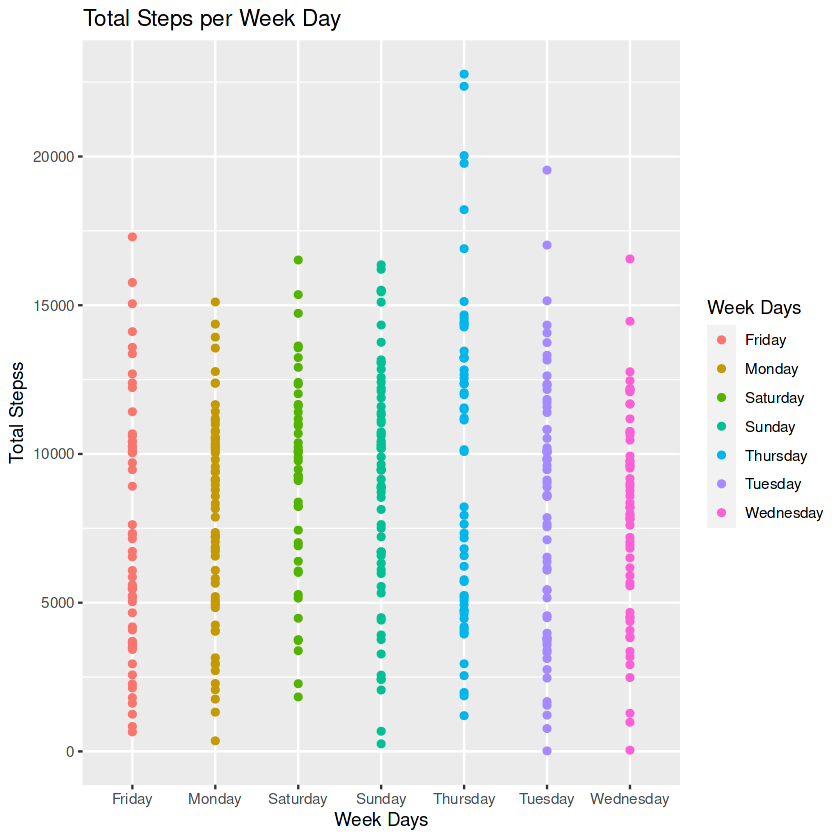

In [17]:
#####  Total Steps per Week Day   

ggplot(data = myData,mapping = aes(x = act_weekday,y = TotalSteps,color = act_weekday) ) +
  geom_point()+
  labs(
    title = "Total Steps per Week Day",
    x = "Week Days",
    y = "Total Stepss",
    color = "Week Days"
  )

In [18]:
# Let's check which days users are more active (average steps per day)
 summary_log<-myData %>%
  group_by(act_weekday) %>%
  summarise(avg_steps = round(mean(TotalSteps), 2)) %>%
  arrange(-avg_steps)
 
 View(summary_log)

act_weekday,avg_steps
<chr>,<dbl>
Thursday,9871.12
Saturday,9273.22
Sunday,9182.69
Tuesday,8183.52
Monday,8022.86
Wednesday,7901.40
Friday,7297.85


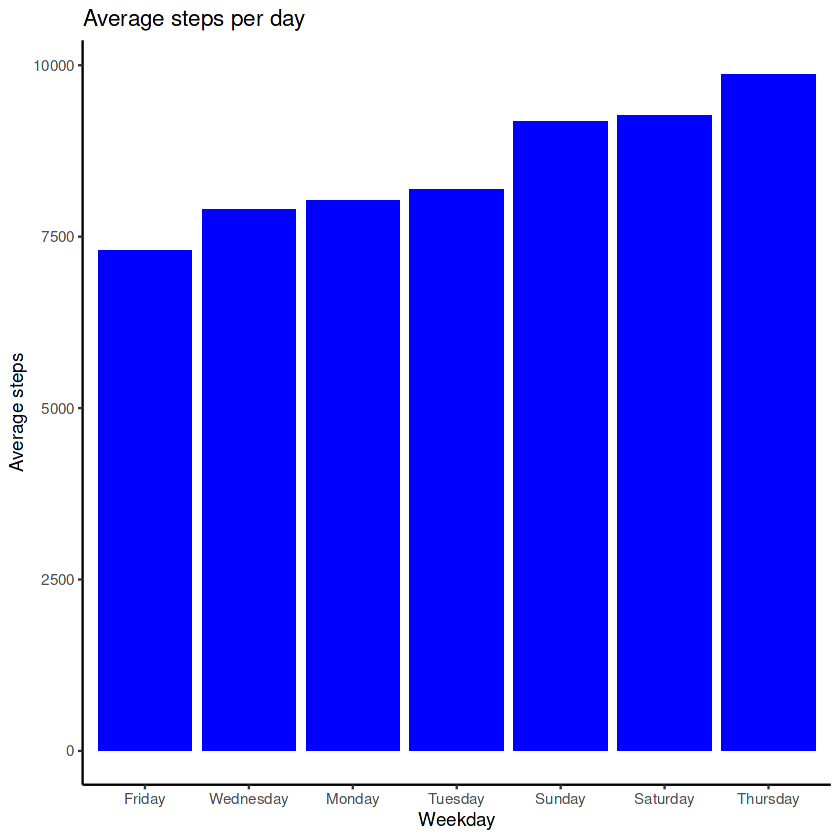

In [19]:
 # Plot it 
 ggplot(data=summary_log,aes(reorder(act_weekday, avg_steps),avg_steps))+
   geom_bar(stat="identity",fill="blue")+
   labs(title="Average steps per day",
        x= "Weekday",
        y= "Average steps")+
   theme_classic()

In [20]:
# Let's check which days users sleeping more (average hours sleep per day)
summary_log<-myData %>%
  group_by(act_weekday) %>%
  summarise(avg_bed_hours = round(mean(TotalHoursInBed), 2)) %>%
  arrange(-avg_bed_hours)
  
View(summary_log)

act_weekday,avg_bed_hours
<chr>,<dbl>
Friday,8.39
Monday,7.83
Thursday,7.66
Saturday,7.62
Wednesday,7.42
Sunday,7.39
Tuesday,7.25


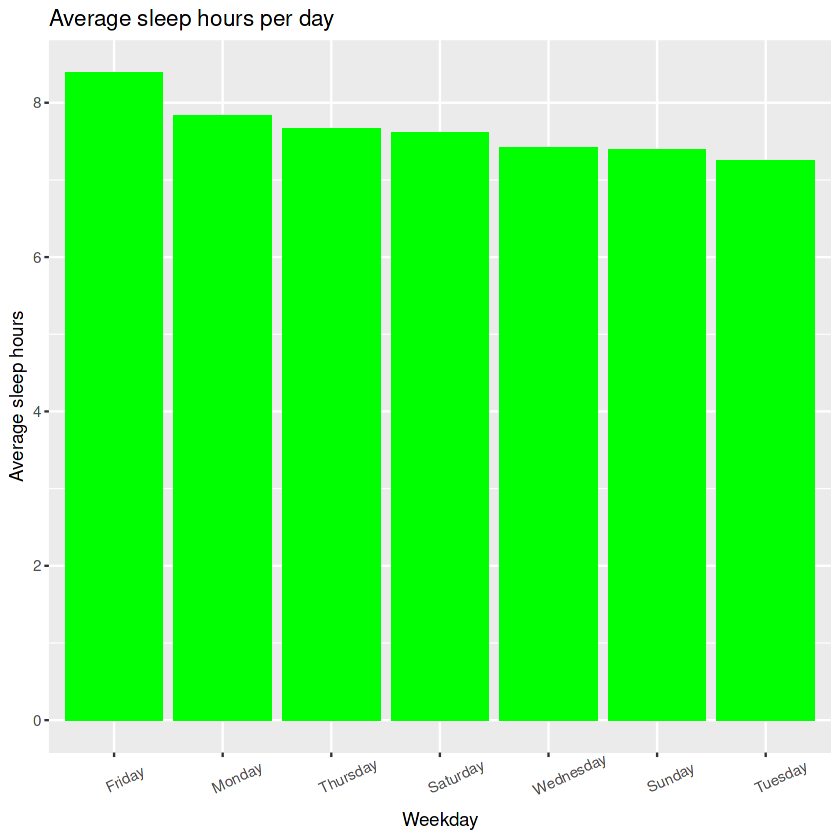

In [21]:
# Plot it avg_bed_hours descending

ggplot(data=summary_log,aes(x = reorder(act_weekday, -avg_bed_hours),avg_bed_hours))+
  geom_bar(stat="identity",fill="green")+
  labs(title="Average sleep hours per day",
       x= "Weekday",
       y= "Average sleep hours")+
  theme(axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=0.2))



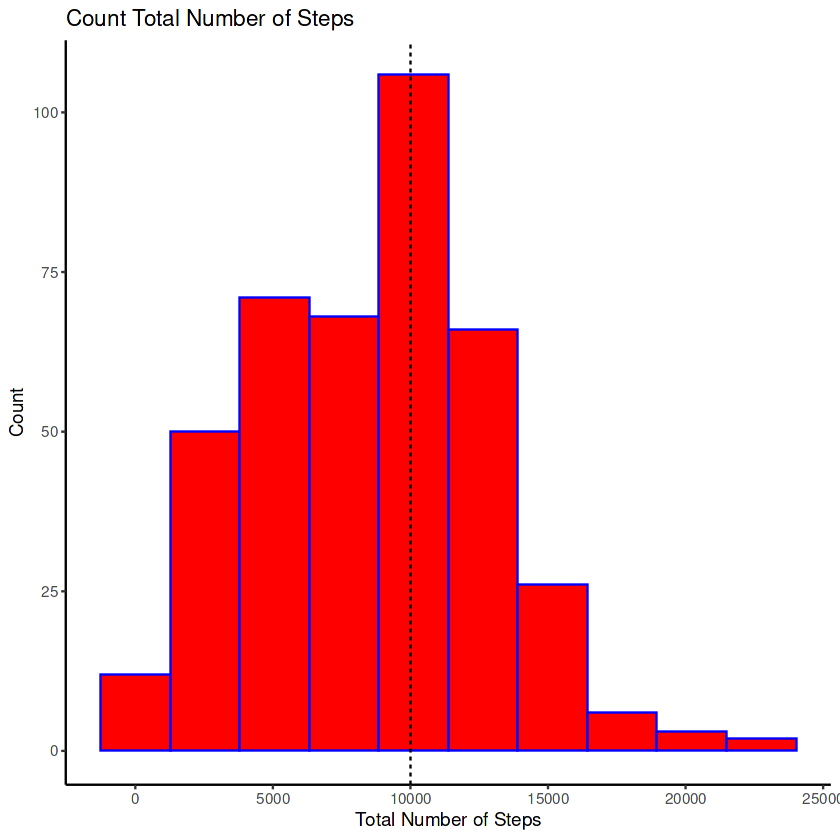

In [22]:
#### Count total number of steps
ggplot(data=myData)+
  geom_histogram(aes(x=TotalSteps),colour="blue",fill='red',
                 bins=10,show.legend=TRUE)+
  geom_vline(aes(xintercept=10000),linetype="dashed",colour="black")+
  labs(title="Count Total Number of Steps",
       x= "Total Number of Steps",
       y= "Count")+
  theme_classic()  

In [23]:
#### Lets group user in 4 groups according their intensity (Total Steps)
#### Insert variable activity_type depending users total steps
myData <- myData %>%
  mutate(
    activity_type = case_when(
      myData$TotalSteps < 5000 ~ "Sedentary",
      myData$TotalSteps >= 5000 & myData$TotalSteps < 7000 ~ "Light",
      myData$TotalSteps >= 7000 & myData$TotalSteps < 10000 ~ "Moderate",
      myData$TotalSteps >= 10000 ~ "Vigorous"
    ))


In [24]:
### Count Totals activity_type
myData %>%
  group_by(activity_type) %>% 
  summarize(total=n()) 

activity_type,total
<chr>,<int>
Light,56
Moderate,93
Sedentary,96
Vigorous,165


In [25]:
### Create table with the % of use activity type users
daily_activity_percent <- myData %>%
  group_by(activity_type) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) %>%
  group_by(activity_type) %>%
  summarise(total_percent = total / totals) %>%
  mutate(act_percent = scales::percent(total_percent))

View(daily_activity_percent)

activity_type,total_percent,act_percent
<chr>,<dbl>,<chr>
Light,0.1365854,13.66%
Moderate,0.2268293,22.68%
Sedentary,0.2341463,23.41%
Vigorous,0.4024390,40.24%


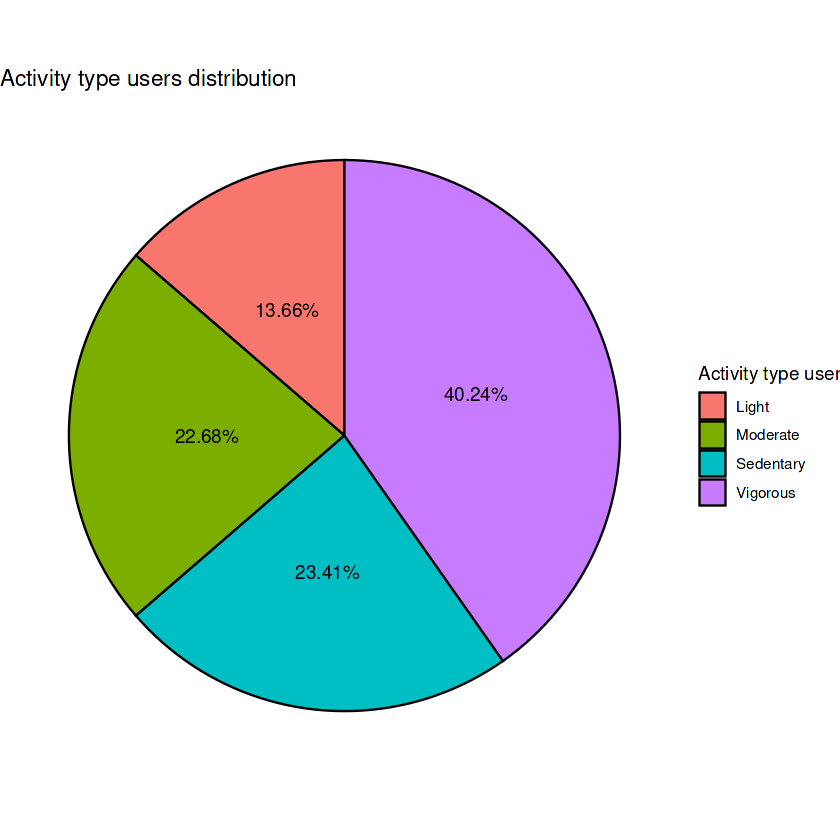

In [26]:
# Plot it

ggplot(daily_activity_percent, aes(x = "", y = total_percent, fill = activity_type)) +
  geom_col(color = "black") +
  geom_text(aes(label = act_percent),
            position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  guides(fill = guide_legend(title = "Activity type users")) +
  labs(title="Activity type users distribution") +
  theme_void()

# Interactive dashboard
An interactive dashboard will be created using shiny package allowing the user to filter the data by activity type, total steps, and users app usage hours.

We'll start by designing the user interface.

In [27]:
# =================================================================
# Find total hours Bellabeat app usage for each user, by adding all hours and inserting new variable
myData <- myData %>% 
  mutate(total_usage_hours =  VeryActiveHours + FairlyActiveHours + LightlyActiveHours +
           SedentaryHours
         ) 

by_activity_type  <- myData %>%
  group_by(activity_type) %>%
  arrange(desc(total_usage_hours))


# Define the user interface
ui <- fluidPage(
  titlePanel("User most usage hours"),
  sidebarLayout(
    sidebarPanel(
      selectInput("activity_type", "Activity type:", choices = unique(by_activity_type$activity_type), 
                  selected = unique(by_activity_type$activity_type)[1]),
      sliderInput("TotalSteps", "Steps:", min = min(myData$TotalSteps), max = max(myData$TotalSteps), 
                  value = c(min(myData$TotalSteps), max(myData$TotalSteps)), step = 100),
      sliderInput("total_usage_hours", "Users usage hours:", min = 0, max = 24, value = c(0, 24), step = 0.5)
    ),
    mainPanel(
      tableOutput("records_table")
    )
  )
)

Next step is to design the server logic so the user selections will retrieve the appropriate data from the dataset and display them.

In [28]:
# Define the server logic
server <- function(input, output) {
  filtered_data <- reactive({
    by_activity_type %>%
      filter(activity_type == input$activity_type & 
               TotalSteps >= input$TotalSteps[1] & TotalSteps <= input$TotalSteps[2] &
               total_usage_hours >= input$total_usage_hours[1] & total_usage_hours <= input$total_usage_hours[2])
  })
  
  output$records_table <- renderTable({
    filtered_data()
  })
}

Run the app

In [29]:
# Run the shinyApp 
#shinyApp(ui = ui, server = server)

<b>The app will run on Kaggle's servers but if you want to see the result you have to run the code to your pc / laptop.
    Here is the result on my laptop.</b>

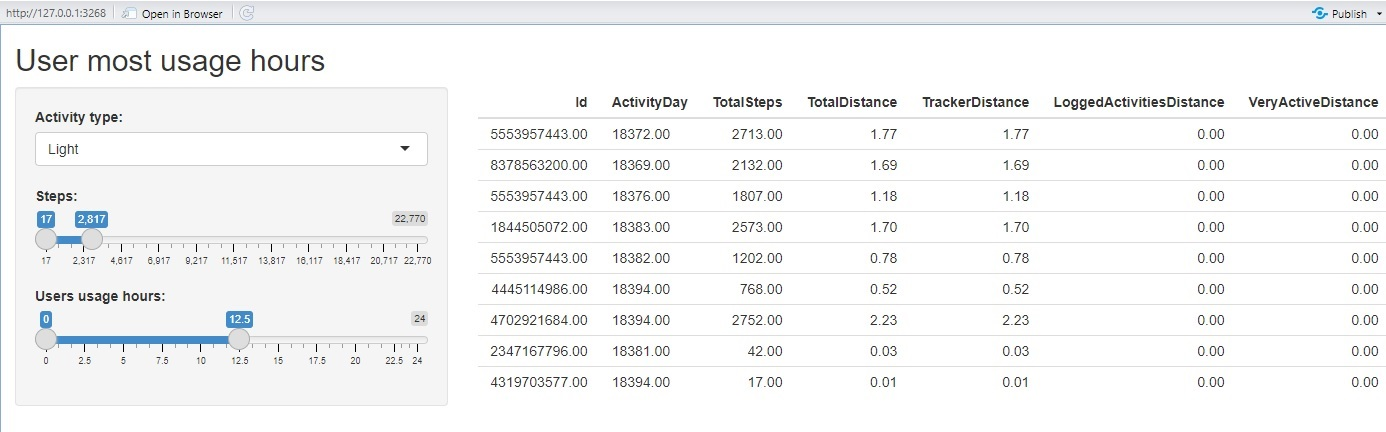

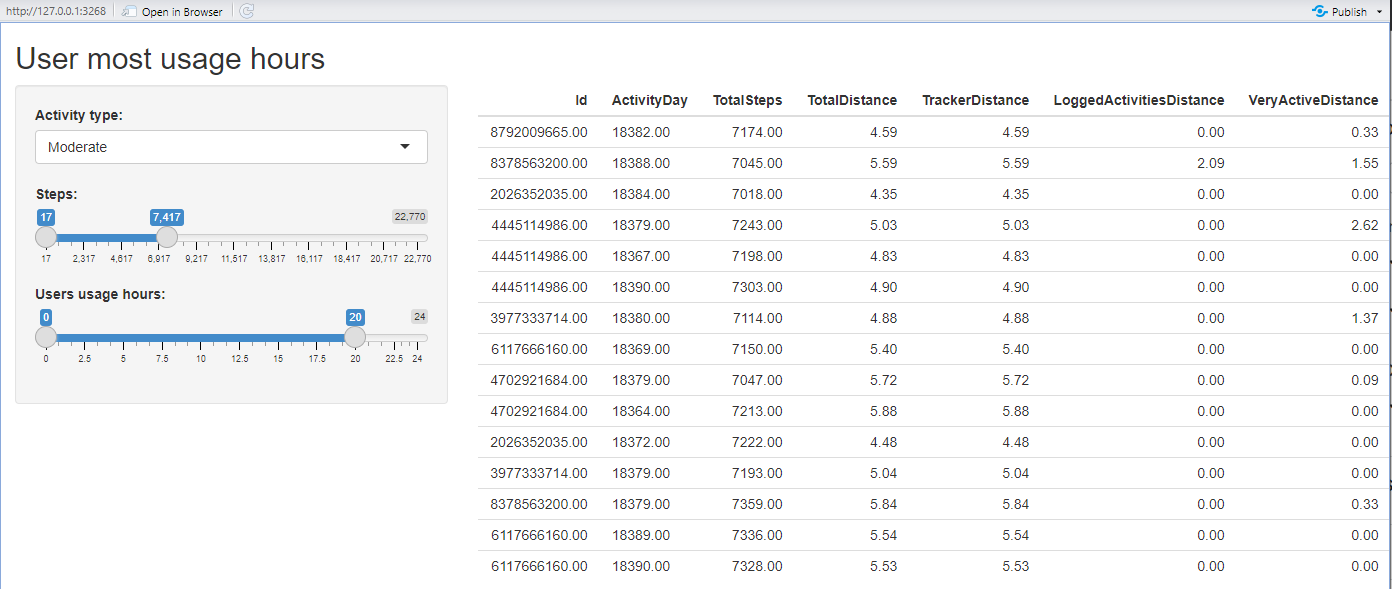

# Correlations
We will determine if there is any correlation between :

* Calories vs Total Distance
* Calories vs Total Steps
* Total Distance vs Total Steps

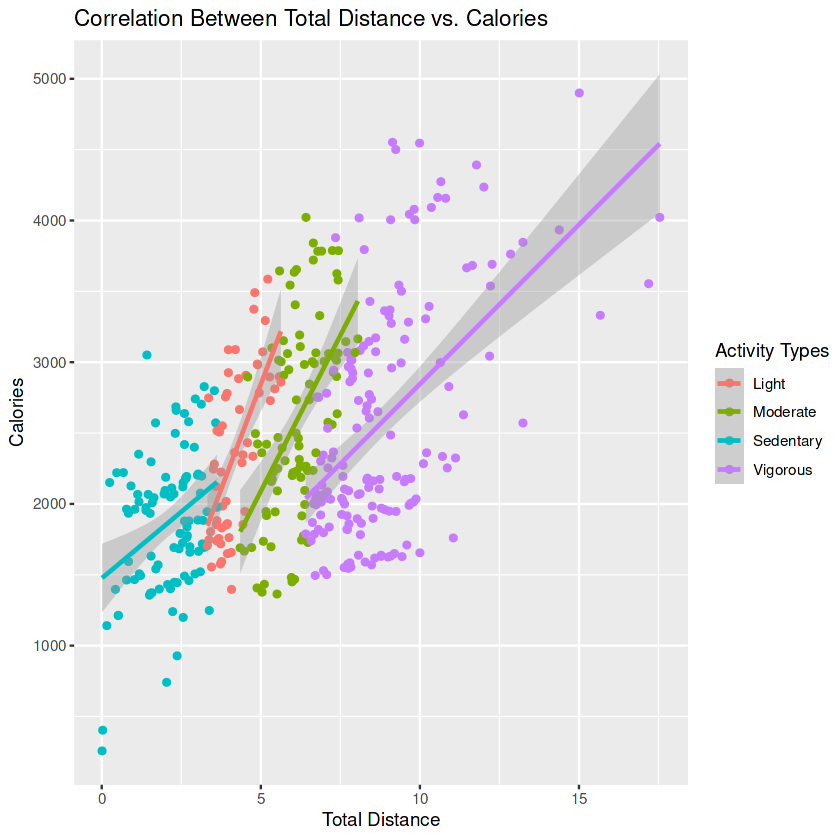

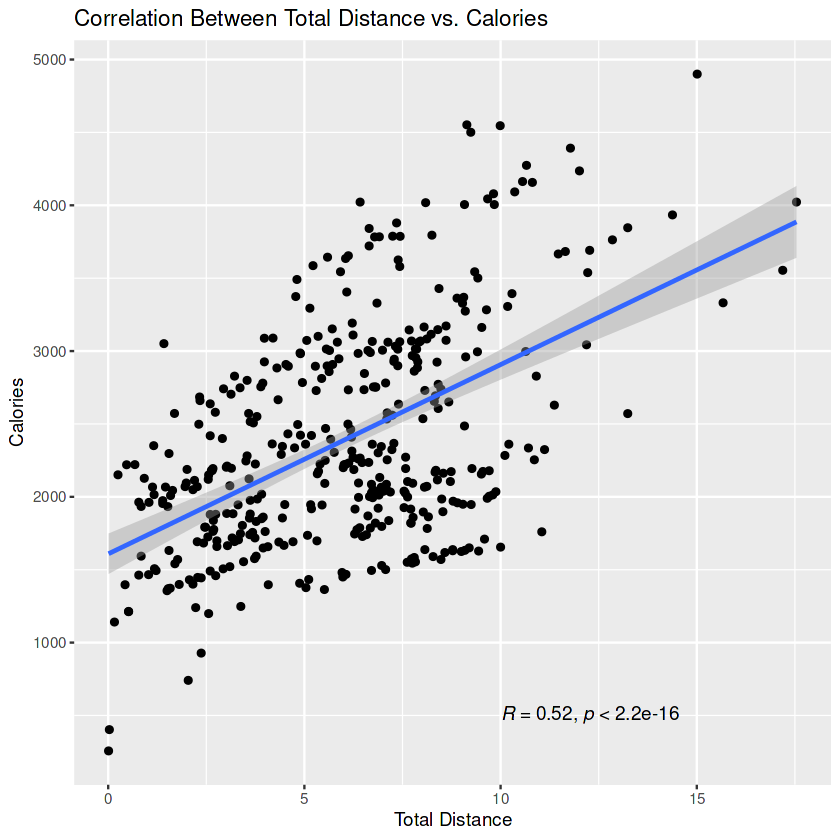

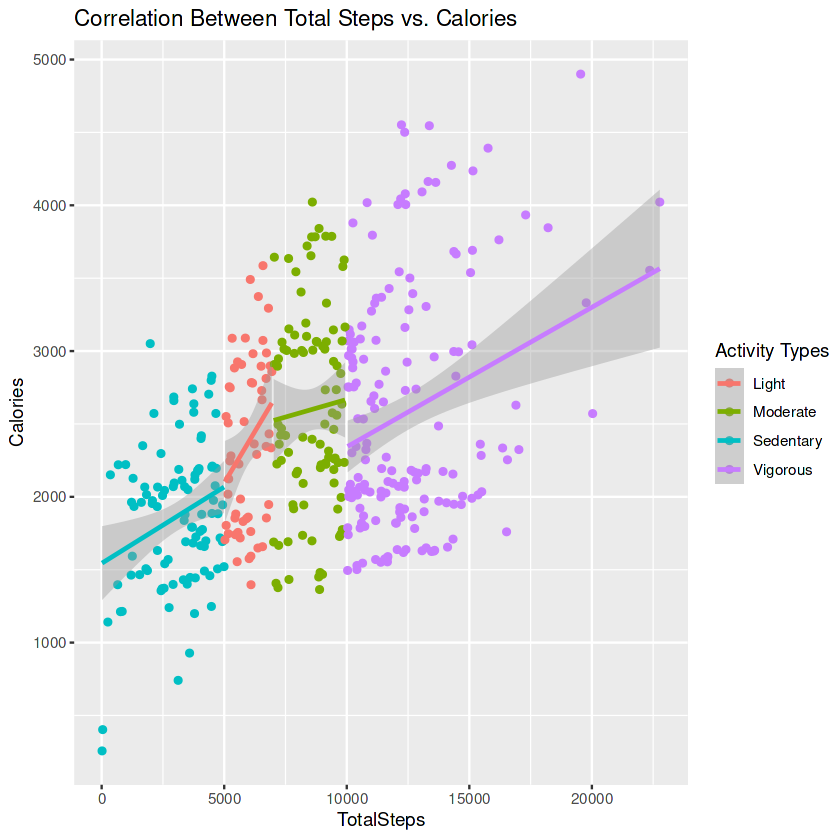

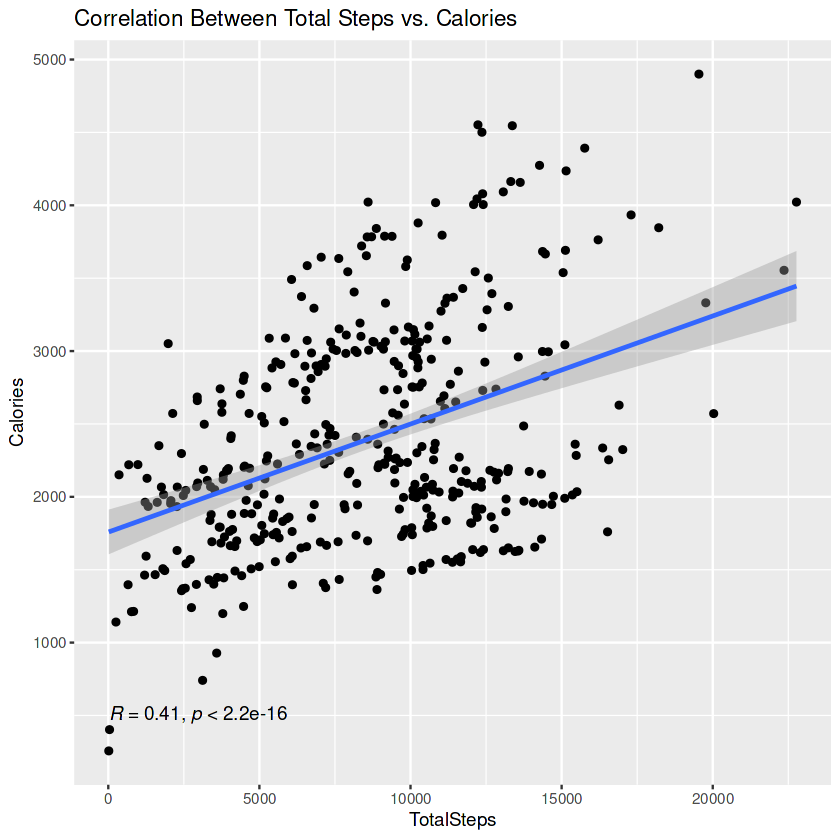

In [30]:
###Calories vs Total Distance
ggplot(data=myData, aes(x=TotalDistance, y=Calories, color=activity_type)) +
  geom_point() + geom_smooth(formula = y ~ x, method = "lm") + 
  labs(title="Correlation Between Total Distance vs. Calories")+ xlab("Total Distance") +
  labs(colour="Activity Types")

###Calories vs Total Distance
ggplot(data=myData, aes(x=TotalDistance, y=Calories)) +
  geom_point() + geom_smooth(formula = y ~ x, method = "lm") + 
  stat_cor(method = "pearson", label.x = 10, label.y = 500)+ 
  labs(title="Correlation Between Total Distance vs. Calories")+ xlab("Total Distance") +
  labs(colour="Activity Types")
###########################################################################

###Calories vs Total Steps
ggplot(data=myData, aes(x=TotalSteps, y=Calories, color=activity_type)) + 
  geom_point() + geom_smooth(formula = y ~ x, method = "lm") + 
  labs(title="Correlation Between Total Steps vs. Calories")+ xlab("TotalSteps")+
  labs(colour="Activity Types")

###Calories vs Total Steps
ggplot(data=myData, aes(x=TotalSteps, y=Calories)) + 
  geom_point() + geom_smooth(formula = y ~ x, method = "lm") + 
  stat_cor(method = "pearson", label.x = 10, label.y = 500) +
  labs(title="Correlation Between Total Steps vs. Calories")+ xlab("TotalSteps")+
  labs(colour="Activity Types")



There is a moderate uphill (positive) correlation between Calories vs Total Distance (R=0.52) and a weak uphill (positive) correlation between Calories vs Total Steps (R=0.41)

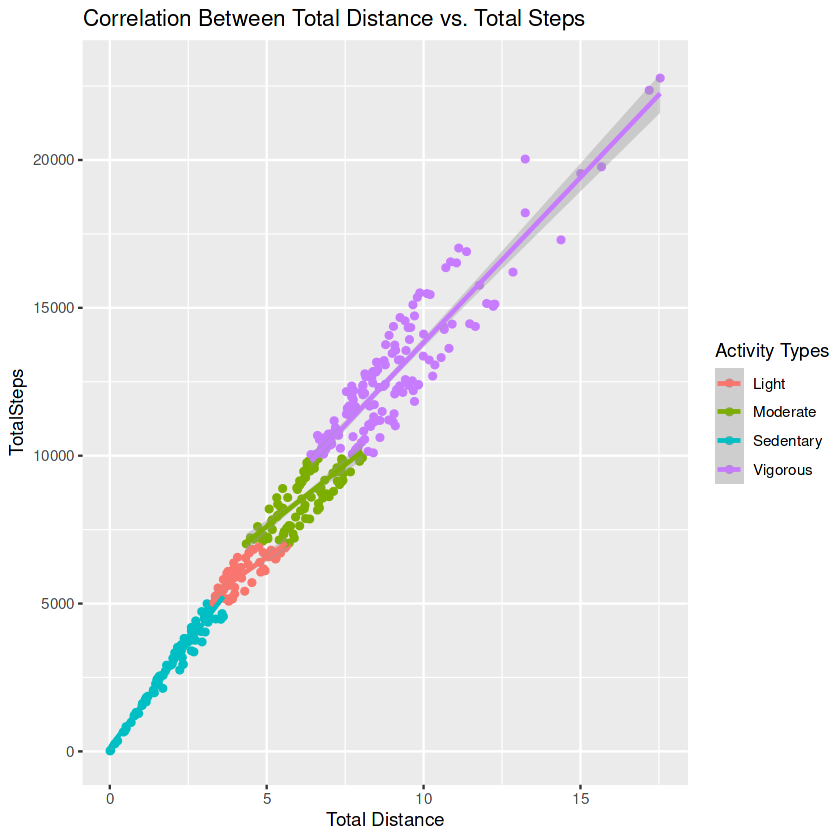

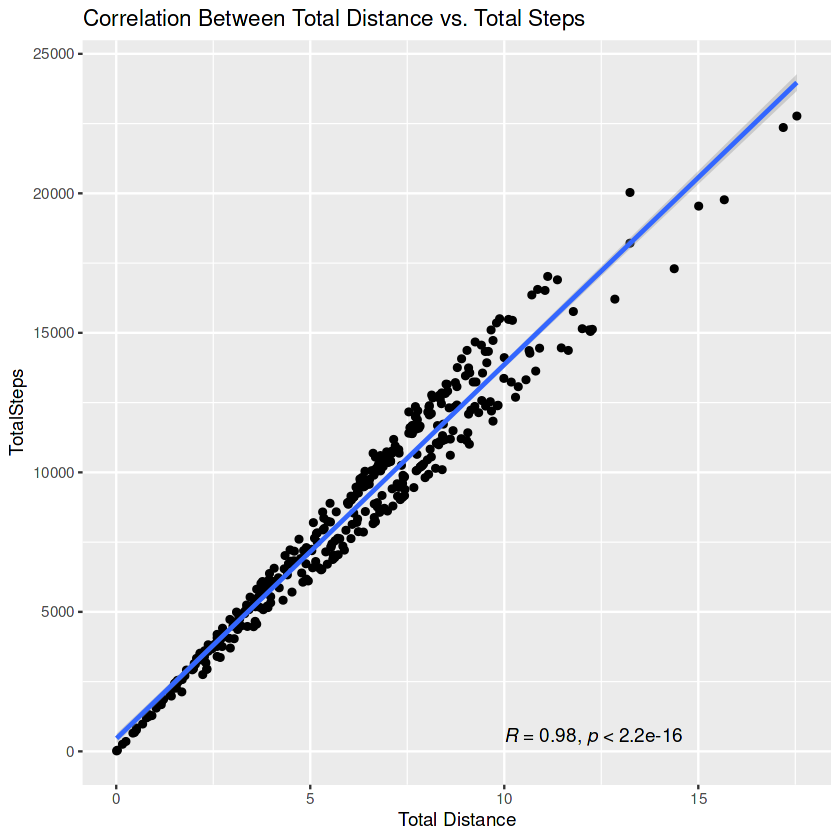

In [31]:
ggplot(data=myData, aes(x=TotalDistance, y=TotalSteps, color=activity_type)) + 
  geom_point() + geom_smooth(formula = y ~ x, method = "lm") + 
  labs(title="Correlation Between Total Distance vs. Total Steps")+ xlab("Total Distance")+
  labs(colour="Activity Types")

###Total Distance vs Total Steps
ggplot(data=myData, aes(x=TotalDistance, y=TotalSteps)) + 
  geom_point() + geom_smooth(formula = y ~ x, method = "lm") + 
  stat_cor(method = "pearson", label.x = 10, label.y = 500)+ 
  labs(title="Correlation Between Total Distance vs. Total Steps")+ xlab("Total Distance")+
  labs(colour="Activity Types")

There is a very strong, almost perfect uphill (positive) correlation  between Total Distance vs Total Steps (R=0.98)

In [32]:
#### Average hours usage per weekday
summary_log<-myData %>%
  group_by(act_weekday) %>%
  summarise(avg_usage_hours = round(mean(total_usage_hours), 2)) %>%
  arrange(-(avg_usage_hours))

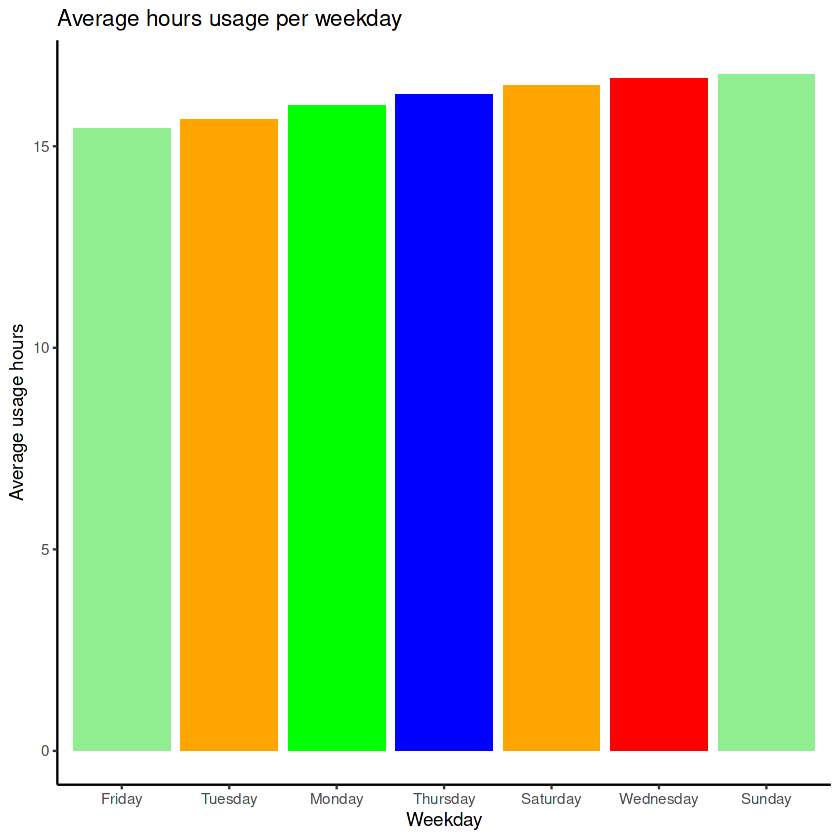

In [33]:
# Plot Average hours usage per weekday
ggplot(data=summary_log,aes(reorder(act_weekday, avg_usage_hours),avg_usage_hours))+
  geom_bar(stat="identity",fill=c("lightgreen","red","orange","blue","green","orange","lightgreen"))+
      labs(title="Average hours usage per weekday",
       x= "Weekday",
       y= "Average usage hours")+
  theme_classic()

In [34]:
#### Count usage hour 
summary_log<-myData %>%
  mutate(total_usage_hours = round(total_usage_hours,0)) %>% 
  group_by(total_usage_hours) %>%
  summarise(total = n()) %>%
  mutate(totals = sum(total)) 

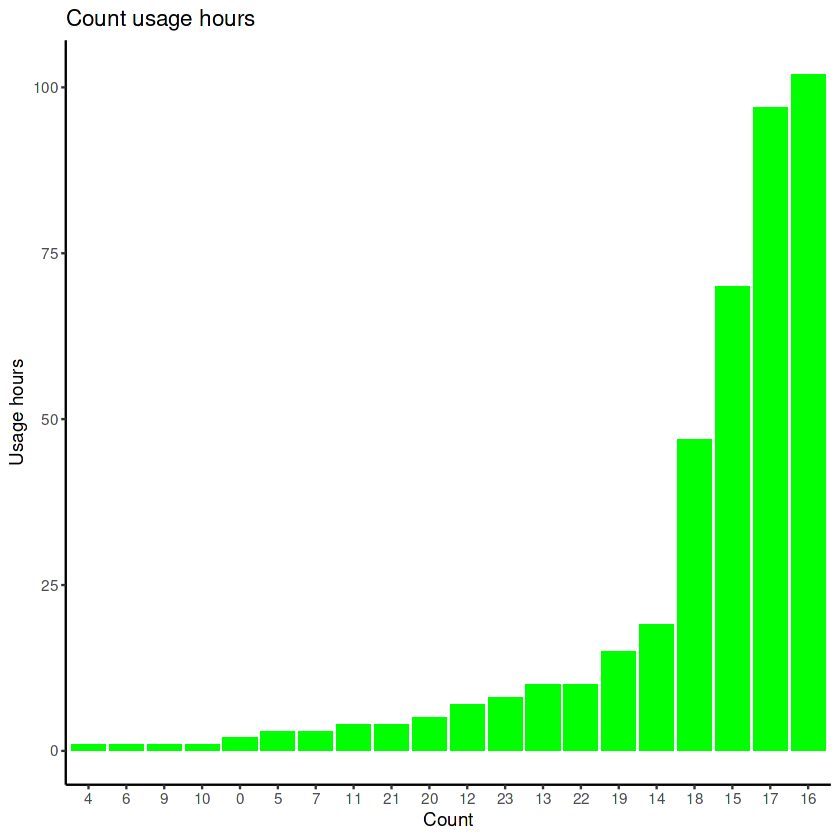

In [35]:
# Plot Count usage hour 
ggplot(data=summary_log,aes(reorder(total_usage_hours, total),total))+
  geom_bar(stat="identity",fill="green")+
  labs(title="Count usage hours",
       x= "Count",
       y= "Usage hours")+
  theme_classic()

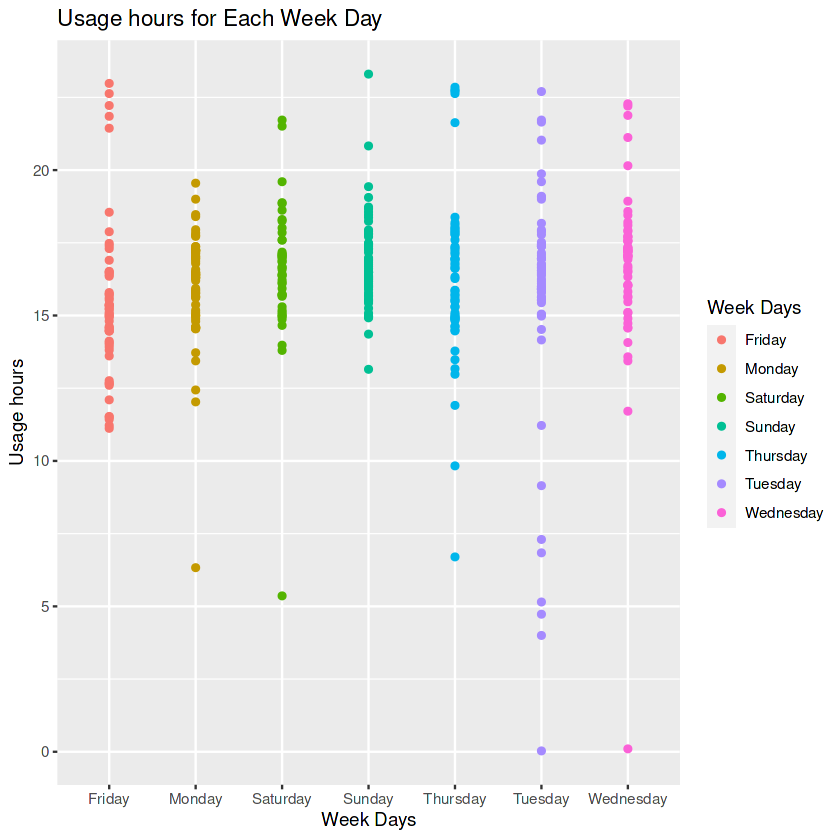

In [36]:
#####  Usage hours for Each Week Day   

ggplot(data = myData,mapping = aes(x = act_weekday,y = total_usage_hours,color = act_weekday) ) +
  geom_point()+
  labs(
    title = "Usage hours for Each Week Day",
    x = "Week Days",
    y = "Usage hours",
    color = "Week Days"
  )


In [37]:
#### Insert variable level_usage depending usage hours
myData <- myData %>%
  mutate(
    level_usage = case_when(
      total_usage_hours < 10 ~ "Light",
      total_usage_hours >= 10 & total_usage_hours < 15 ~ "Moderate",
      total_usage_hours >= 15 & total_usage_hours < 20 ~ "High",
      total_usage_hours >= 18 ~ "Extreme"
    ))

### Create table with the % of use activity type user

daily_activity_percent <- myData %>% 
  group_by(level_usage) %>% # Variable to be transformed
  count() %>% 
  ungroup() %>% 
  mutate(perc = `n` / sum(`n`)) %>% 
  arrange(perc) %>%
  mutate(act_percent = scales::percent(perc))

View(daily_activity_percent)

level_usage,n,perc,act_percent
<chr>,<int>,<dbl>,<chr>
Light,12,0.02926829,2.9%
Extreme,23,0.05609756,5.6%
Moderate,78,0.19024390,19.0%
High,297,0.72439024,72.4%


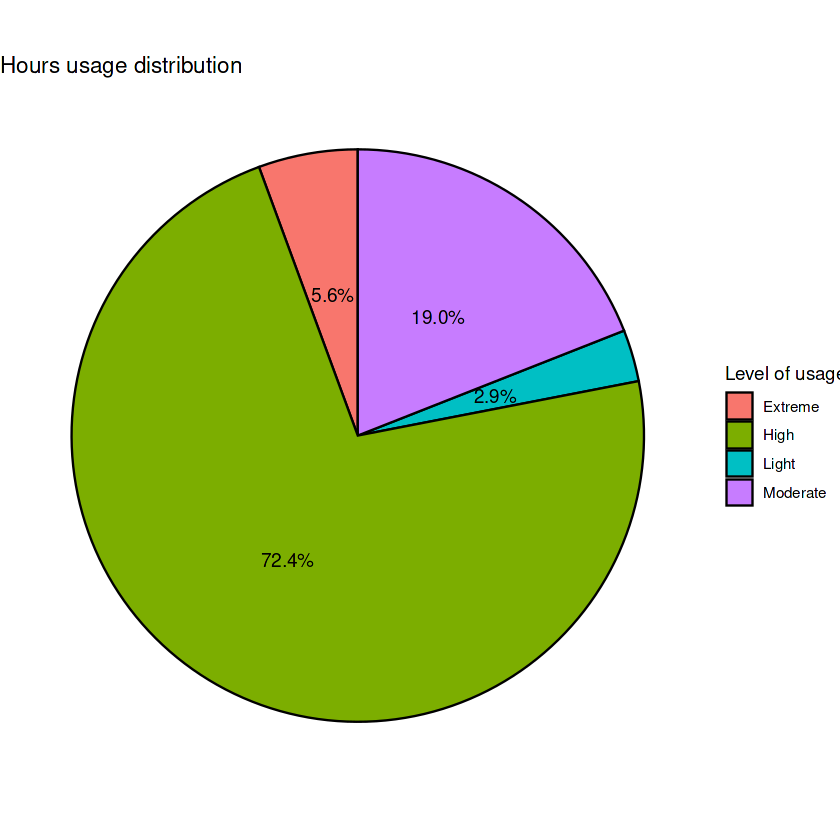

In [38]:
# < 10 ~ "Light", >= 10 &  < 15 ~ "Moderate", >= 15 & t < 20 ~ "High", >= 18 ~ "Extreme"
# Plot it
ggplot(daily_activity_percent, aes(x = "", y = perc, fill = level_usage)) +
  geom_col(color = "black") +
  geom_text(aes(label = act_percent),
  position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  guides(fill = guide_legend(title = "Level of usage")) +
  labs(title="Hours usage distribution") +
  theme_void()


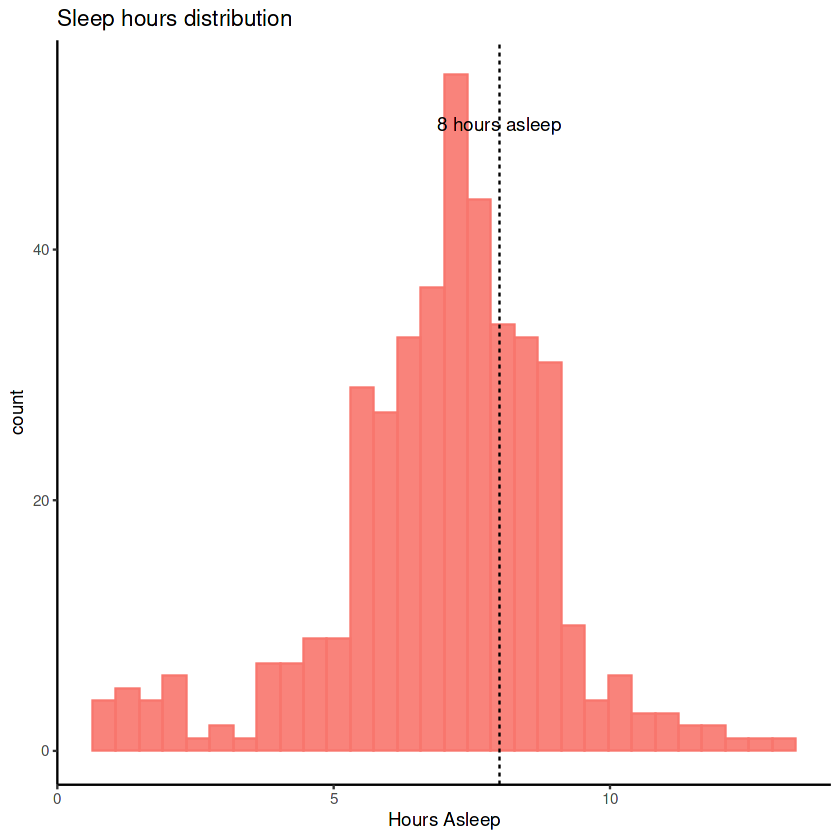

In [39]:
ggplot(data = myData) +
  geom_histogram(mapping = aes(x = TotalHoursAsleep, fill = 'orange',
                               color = 'black'), bins = 30, alpha = 0.9,
                 show.legend = FALSE) +
  labs(title = "Sleep hours distribution", x = 'Hours Asleep') +
  geom_vline(aes(xintercept=8),linetype="dashed",colour="black")+
  annotate("text",x=8,y=50,label="8 hours asleep")+
  labs(y="count")+
  theme_classic()

# Adult Body Mass Index
BMI is a person’s weight in kilograms divided by the square of height in meters. A high BMI can indicate high body fatness.

If your BMI is less than 18.5, it falls within the underweight range.
If your BMI is 18.5 to <25, it falls within the healthy weight range.
If your BMI is 25.0 to <30, it falls within the overweight range.
If your BMI is 30.0 or higher, it falls within the obesity range.

Obesity is frequently subdivided into categories:
Class 1: BMI of 30 to < 35
Class 2: BMI of 35 to < 40
Class 3: BMI of 40 or higher. Class 3 obesity is sometimes categorized as “severe” obesity.

In [40]:
#If your BMI is less than 18.5, it falls within the underweight range.
#If your BMI is 18.5 to <25, it falls within the healthy weight range.
#If your BMI is 25.0 to <30, it falls within the overweight range.
#If your BMI is 30.0 or higher, it falls within the obesity range.

# Create BMI Level variable 
weight <- weight %>%
  mutate(bmi_level = case_when(
      BMI < 18.5 ~ "underweight",
      BMI >= 18.5 & BMI < 25 ~ "healthy",
      BMI >= 25 & BMI < 30 ~ "overweight",
      BMI >= 30 ~ "obesity"
    ))

# Create Obesity Level variable 
weight <- weight %>%
  mutate(obesity_level = case_when(
      BMI < 35 ~ "Class 1",
      BMI >= 35 & BMI < 40 ~ "Class 2",
      BMI >= 18 ~ "Class 3"
    ))
head(weight)

Id,ActivityDay,WeightKg,WeightPounds,BMI,IsManualReport,LogId,bmi_level,obesity_level
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<chr>,<chr>
1503960366,2020-05-02,52.6,115.9631,22.65,TRUE,1.462234e+12,healthy,Class 1
1503960366,2020-05-03,52.6,115.9631,22.65,TRUE,1.462320e+12,healthy,Class 1
1927972279,2020-04-13,133.5,294.3171,47.54,FALSE,1.460510e+12,obesity,Class 3
2873212765,2020-04-21,56.7,125.0021,21.45,TRUE,1.461283e+12,healthy,Class 1
2873212765,2020-05-12,57.3,126.3249,21.69,TRUE,1.463098e+12,healthy,Class 1
4319703577,2020-04-17,72.4,159.6147,27.45,TRUE,1.460938e+12,overweight,Class 1


In [41]:
### Create table with the % of BMI Level users

daily_activity_percent <- weight %>% 
  group_by(bmi_level) %>% # Variable to be transformed
  count() %>% 
  ungroup() %>% 
  mutate(perc = `n` / sum(`n`)) %>% 
  arrange(perc) %>%
  mutate(act_percent = scales::percent(perc))

head(daily_activity_percent)

bmi_level,n,perc,act_percent
<chr>,<int>,<dbl>,<chr>
obesity,1,0.01492537,1.5%
overweight,32,0.47761194,47.8%
healthy,34,0.50746269,50.7%


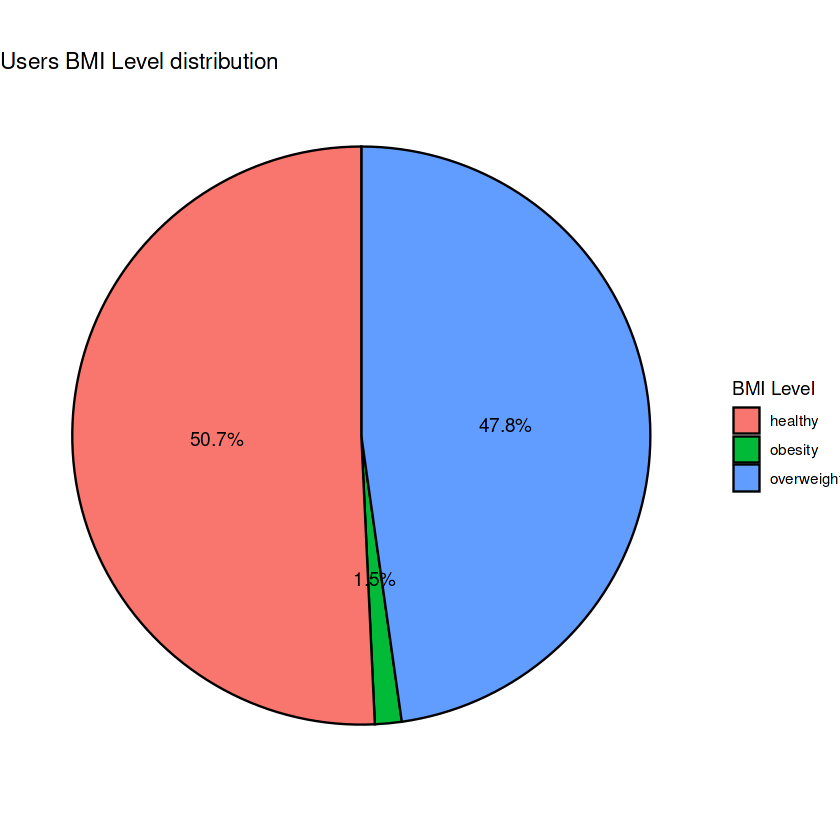

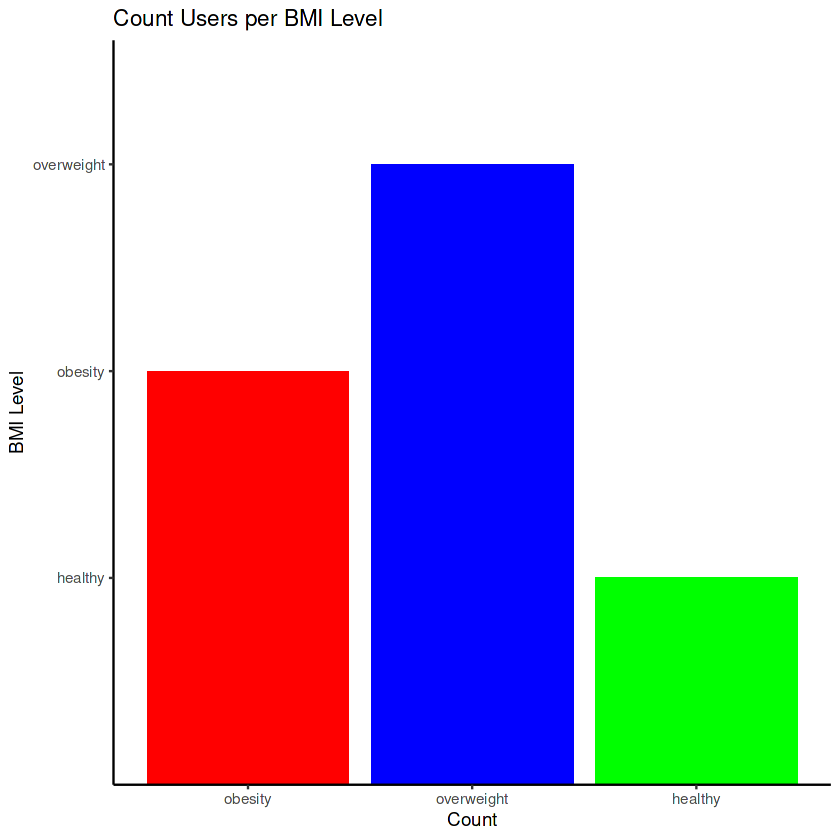

In [42]:
# Plot it - BMI Level users %
ggplot(daily_activity_percent, aes(x = "", y = perc, fill = bmi_level)) +
  geom_col(color = "black") +
  geom_text(aes(label = act_percent),
  position = position_stack(vjust = 0.5)) +
  coord_polar(theta = "y") +
  guides(fill = guide_legend(title = "BMI Level")) +
  labs(title="Users BMI Level distribution") +
  theme_void()

ggplot(data=daily_activity_percent,aes(reorder(bmi_level,n),bmi_level))+
  geom_bar(stat="identity",fill= c("red","blue", "green"))+
  labs(title="Count Users per BMI Level",
       x= "Count",
       y= "BMI Level")+
  theme_classic()

# <span style="color:#73aafa">  6. Act Phase (Conclusion) </span> 


The given data sample is relatively small, low quality and we encounter sampling bias (sample size only 30 users, not represent the population). Problem also are the two months long only time limitation of the survey and that was collected years ago .

<b>Summary</b>
* The average daily steps are slightly lower than the recommended 8.000 steps.
* The average sleep is around 7.5 hours which is acceptable. Recommended is 8 hours/day.
* Regarding weight data, 50% of the users are overweight/obese. 
* There is a very strong, almost perfect uphill (positive) correlation  between Total Distance vs Total Steps (R=0.98).
* There is a moderate uphill (positive) correlation between Calories vs Total Distance (R=0.52) and a weak uphill (positive) correlation between Calories vs Total Steps (R=0.41).

<b>Recommendations</b>
* Daily reward (badge, medal) when users reach the recommended 8.000 Send notifications to encourage them.
* Set monthly / annually  goals for users.
* Monthly/annually rewards, such as badget/medal, discount on Bellabeat products when users reach monthly/annually  goals.
* Recommend training program according user weight, habits, location etc.
* Recommend special training program, diets, healthy foods to overweight/obese users.
* Colour variaty to Bellabeat products, reshape them, make them more attractive to users.
* Perform research questionnaire among users to discover what they want us to improve, to change, to add fictures etc.



